In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experiment 3

In [ ]:
!unzip -u '/content/drive/MyDrive/00SoftLab/ass2/Dataset_2.zip' -d /content/drive/MyDrive/00SoftLab/ass2

Archive:  /content/drive/MyDrive/00SoftLab/ass2/Dataset_2.zip
   creating: /content/drive/MyDrive/00SoftLab/ass2/Dataset_2/
  inflating: /content/drive/MyDrive/00SoftLab/ass2/Dataset_2/t10k-images-idx3-ubyte  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/Dataset_2/t10k-labels-idx1-ubyte  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/Dataset_2/train-images-idx3-ubyte  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/Dataset_2/train-labels-idx1-ubyte  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/Dataset_2/verification_test.csv  
  inflating: /content/drive/MyDrive/00SoftLab/ass2/Dataset_2/verification_train.csv  


In [ ]:
train_csv2  = pd.read_csv('/content/drive/MyDrive/00SoftLab/ass2/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/drive/MyDrive/00SoftLab/ass2/Dataset_2/verification_test.csv')

In [ ]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [ ]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [ ]:
print(len(train_set))
print(len(test_set))

60000
10000


In [ ]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.9561044573783875. Accuracy: 76.05
Iteration: 1000. Loss: 0.7807536125183105. Accuracy: 72.99
Iteration: 1500. Loss: 0.5110641717910767. Accuracy: 82.94
Iteration: 2000. Loss: 0.3372117578983307. Accuracy: 83.37
Iteration: 2500. Loss: 0.2819584608078003. Accuracy: 83.35
Iteration: 3000. Loss: 0.46139031648635864. Accuracy: 84.05
Iteration: 3500. Loss: 0.45207685232162476. Accuracy: 84.26
Iteration: 4000. Loss: 0.6094282269477844. Accuracy: 85.0
Iteration: 4500. Loss: 0.48109132051467896. Accuracy: 82.88
Iteration: 5000. Loss: 0.25096946954727173. Accuracy: 85.4
Iteration: 5500. Loss: 0.08392863720655441. Accuracy: 86.62
Iteration: 6000. Loss: 0.2019312083721161. Accuracy: 85.96
Iteration: 6500. Loss: 0.1172996535897255. Accuracy: 86.69
Iteration: 7000. Loss: 0.7658794522285461. Accuracy: 86.1
Iteration: 7500. Loss: 0.4077247083187103. Accuracy: 86.87
Iteration: 8000. Loss: 0.38944780826568604. Accuracy: 86.93
Iteration: 8500. Loss: 0.30823272466659546. Accuracy: 

[0.9561044573783875, 0.7807536125183105, 0.5110641717910767, 0.3372117578983307, 0.2819584608078003, 0.46139031648635864, 0.45207685232162476, 0.6094282269477844, 0.48109132051467896, 0.25096946954727173, 0.08392863720655441, 0.2019312083721161, 0.1172996535897255, 0.7658794522285461, 0.4077247083187103, 0.38944780826568604, 0.30823272466659546, 0.4228009581565857, 0.6075645685195923, 0.21012043952941895, 0.4593225419521332, 0.6059972047805786, 0.16767118871212006, 0.8874565958976746, 0.4932243824005127, 0.35570037364959717, 0.2066434919834137, 0.35042715072631836, 0.15242378413677216, 0.4992453455924988, 0.3724122941493988, 0.2807267904281616, 0.2920598089694977, 0.19523538649082184, 0.6051904559135437, 0.36165326833724976]


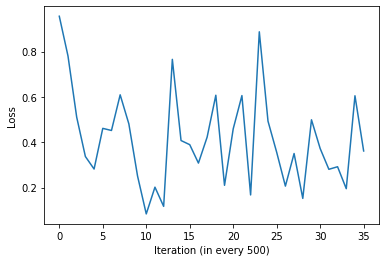

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

For experiment 2

In [ ]:
# Hyperparameters

batch_size = 80
num_iters = 80000
input_dim = 28*28 # num_features = 784
num_hidden = 500 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)

         ### 4rd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_4(out)

      ### 5rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)

      ### 6rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_6(out)
      
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.5340004563331604. Accuracy: 82.62
Iteration: 1000. Loss: 0.4651535451412201. Accuracy: 84.75
Iteration: 1500. Loss: 0.5395568013191223. Accuracy: 84.8
Iteration: 2000. Loss: 0.20793554186820984. Accuracy: 86.34
Iteration: 2500. Loss: 0.35139262676239014. Accuracy: 87.22
Iteration: 3000. Loss: 0.18725106120109558. Accuracy: 87.94
Iteration: 3500. Loss: 0.3169317841529846. Accuracy: 86.95
Iteration: 4000. Loss: 0.22911424934864044. Accuracy: 87.83
Iteration: 4500. Loss: 0.3911933898925781. Accuracy: 84.94
Iteration: 5000. Loss: 0.2844852805137634. Accuracy: 87.67
Iteration: 5500. Loss: 0.24514099955558777. Accuracy: 88.48
Iteration: 6000. Loss: 0.256070077419281. Accuracy: 88.38
Iteration: 6500. Loss: 0.20562651753425598. Accuracy: 87.72
Iteration: 7000. Loss: 0.3427276015281677. Accuracy: 85.93
Iteration: 7500. Loss: 0.1464771032333374. Accuracy: 88.44
Iteration: 8000. Loss: 0.2847471833229065. Accuracy: 88.87
Iteration: 8500. Loss: 0.23772218823432922. Accuracy:

[0.5340004563331604, 0.4651535451412201, 0.5395568013191223, 0.20793554186820984, 0.35139262676239014, 0.18725106120109558, 0.3169317841529846, 0.22911424934864044, 0.3911933898925781, 0.2844852805137634, 0.24514099955558777, 0.256070077419281, 0.20562651753425598, 0.3427276015281677, 0.1464771032333374, 0.2847471833229065, 0.23772218823432922, 0.16753792762756348, 0.17171140015125275, 0.19637736678123474, 0.14182507991790771, 0.1549372375011444, 0.17734332382678986, 0.12533605098724365, 0.15591669082641602, 0.17951378226280212, 0.16432446241378784, 0.13511548936367035, 0.2157551348209381, 0.2549048364162445, 0.12117631733417511, 0.14289967715740204, 0.07548265159130096, 0.15709470212459564, 0.08962768316268921, 0.06103906035423279, 0.0973300188779831, 0.09598828107118607, 0.054659344255924225, 0.02776814065873623, 0.14886005222797394, 0.13759562373161316, 0.05471101403236389, 0.07264114916324615, 0.10003568232059479, 0.08617011457681656, 0.10405794531106949, 0.16371455788612366, 0.152

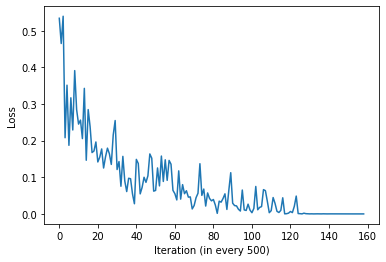

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()